Decision Tree

* 분류, 예측
* 의사결정나무
* 앙상블 모형으로 확대 : 배깅, 부스팅
* 과적합 문제 고려
+ 성능평가 : 혼돈행렬


쉬어가기
https://kr.akinator.com/game

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 오류 안뜨게 무시하기
import warnings
warnings.filterwarnings('ignore')
# 한글폰트 출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 SET

## 타이타닉 데이터 가지고 오기

In [2]:
df = pd.read_csv('./titanic.csv')

In [3]:
# 컬럼정보
# Passengerld : 탑승자 데이터 일련번호
# Survived : 생존여부, 0 = 사망, 1= 생존
# Pclass : 티켓의 선실 등금, 1 = 일등석, 2 = 이등석, 3 = 삼등석
# Name : 탑승자 이름
# Sex : 탑승자 성별
# Age : 탑승자 나이
# SibSp : 같이 탑승한 형제자매 또는 배우자 인원 수
# Parch : 같이 탑승한 부모님 또는 어린이 인원수
# Ticket : 티켓번호 
# Fare : 요금
# Cabin : 선실번호
# Embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

## 데이터 확인

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# 필요없는 컬럼을 제거합니다.
df0 = df.drop(['Age', 'Cabin'], axis = 1)
df0

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [6]:
#df에서 Embarked가 결측인 두 행을 제거합니다.
df0 = df0.dropna()
#제거 여부 확인해봅니다.
df0.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
#Name변수와 Ticket 변수를 제거합니다.
df1 = df0.drop(['Name', 'Ticket'], axis = 1)

In [8]:
#Sex데이터를 숫자형으로 변환합니다.
df1['Sex'] = df1['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [9]:
#Embarked 데이터를 숫자형으로 변환합니다.
df1['Embarked'] = df1['Embarked'].map( {'C': 0, 'Q': 1, 'S':2} ).astype(int)

## 전처리 후 데이터 확인

In [10]:
df1

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,2
1,2,1,1,1,1,0,71.2833,0
2,3,1,3,1,0,0,7.9250,2
3,4,1,1,1,1,0,53.1000,2
4,5,0,3,0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,13.0000,2
887,888,1,1,1,0,0,30.0000,2
888,889,0,3,1,1,2,23.4500,2
889,890,1,1,0,0,0,30.0000,0


## 데이터 저장

In [11]:
# 저장하기
df1.to_csv('./preprocessing_titanic.csv')

In [12]:
# 전처리 완료 데이터 불러오기
df = pd.read_csv('./preprocessing_titanic.csv',index_col= 'Unnamed: 0')

In [18]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,2
1,2,1,1,1,1,0,71.2833,0
2,3,1,3,1,0,0,7.9250,2
3,4,1,1,1,1,0,53.1000,2
4,5,0,3,0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,13.0000,2
887,888,1,1,1,0,0,30.0000,2
888,889,0,3,1,1,2,23.4500,2
889,890,1,1,0,0,0,30.0000,0


## 데이터 분할

In [13]:
#모델의 훈련을 위하여 설명변수와 반응변수를 분리합니다.
X = df.drop(["PassengerId","Survived"], axis=1)
Y = df["Survived"]

# train-test_split를 통해 train 0.7 test 0.3 비율로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((622, 6), (622,), (267, 6), (267,))

# Decision Tree

In [14]:
# sklesarn 통한 디시전트리 모델 생성 및 예측
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

## 성능평가

In [15]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, Y_test)

array([[143,  33],
       [ 24,  67]], dtype=int64)

In [16]:
# 각종 성능지표 표현
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
    
print(f'Precision (정밀도) :{precision * 100 : .2f}%')
print(f'Recall (재현율) :{recall * 100 : .2f}%')
print(f'Accuracy (정확도) :{accuracy * 100 : .2f}%')
print(f'F1 Score :{f1 * 100 : .2f}%')

Precision (정밀도) : 73.63%
Recall (재현율) : 67.00%
Accuracy (정확도) : 78.65%
F1 Score : 70.16%


## 시각화

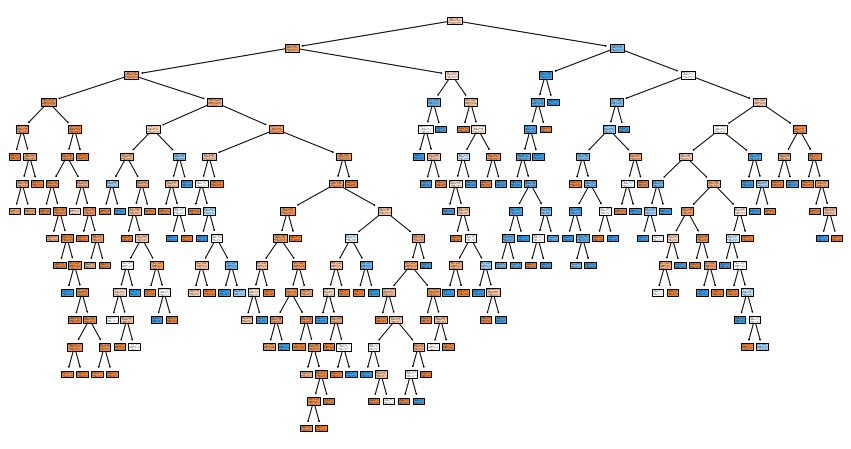

In [17]:
# 디시전트리 시각화 
from sklearn import tree
fig = plt.figure(figsize=(15, 8))
graph = tree.plot_tree(clf, feature_names = X_train.columns,  # feature 이름
                               class_names ="Survived",# target 이름
                  filled=True)